In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
titanic_ds= pd.read_csv("titanic.csv") 
titanic_ds.head()

,PassengerId,Name,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,1,"Braund, Mr. Owen Harris",3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,"Heikkinen, Miss. Laina",3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,female,35.0,1,0,113803,53.1000,C123,S,1
4,5,"Allen, Mr. William Henry",3,male,35.0,0,0,373450,8.0500,NaN,S,0


In [4]:
titanic_ds.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Survived
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,2.308642,29.699118,0.523008,0.381594,32.204208,0.383838
std,257.353842,0.836071,14.526497,1.102743,0.806057,49.693429,0.486592
min,1.000000,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000
25%,223.500000,2.000000,20.125000,0.000000,0.000000,7.910400,0.000000
50%,446.000000,3.000000,28.000000,0.000000,0.000000,14.454200,0.000000
75%,668.500000,3.000000,38.000000,1.000000,0.000000,31.000000,1.000000
max,891.000000,3.000000,80.000000,8.000000,6.000000,512.329200,1.000000


In [5]:
titanic_ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Name         891 non-null    object 
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    object 
 4   Age          714 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Ticket       891 non-null    object 
 8   Fare         891 non-null    float64
 9   Cabin        204 non-null    object 
 10  Embarked     889 non-null    object 
 11  Survived     891 non-null    int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
dset= titanic_ds.drop(['PassengerId', 'Name', 'SibSp', 'Parch', 'Ticket', 'Cabin', 'Embarked'], axis= 1)

In [7]:
dset.head()

,Pclass,Sex,Age,Fare,Survived
0,3,male,22.0,7.2500,0
1,1,female,38.0,71.2833,1
2,3,female,26.0,7.9250,1
3,1,female,35.0,53.1000,1
4,3,male,35.0,8.0500,0


In [8]:
dset.isnull().sum()

Pclass        0
Sex           0
Age         177
Fare          0
Survived      0
dtype: int64

In [9]:
dset.Age.fillna(dset.Age.mean(), inplace= True)

In [10]:
dset.isnull().sum()

Pclass      0
Sex         0
Age         0
Fare        0
Survived    0
dtype: int64

In [11]:
dset.Sex= dset.Sex.map({'male': 1, 'female': 0})

In [12]:
x= dset.drop(['Survived'], axis= 1)

In [13]:
y= dset.Survived

In [14]:
print(x)

     Pclass  Sex        Age     Fare
0         3    1  22.000000   7.2500
1         1    0  38.000000  71.2833
2         3    0  26.000000   7.9250
3         1    0  35.000000  53.1000
4         3    1  35.000000   8.0500
..      ...  ...        ...      ...
886       2    1  27.000000  13.0000
887       1    0  19.000000  30.0000
888       3    0  29.699118  23.4500
889       1    1  26.000000  30.0000
890       3    1  32.000000   7.7500

[891 rows x 4 columns]


In [15]:
print(y)

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64


In [16]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size= 0.2)

In [17]:
from sklearn.naive_bayes import GaussianNB

In [18]:
NB_mod= GaussianNB()

In [19]:
NB_mod.fit(x_train, y_train)

GaussianNB()

In [20]:
NB_mod.score(x_test, y_test)

0.776536312849162

In [21]:
from sklearn.metrics import confusion_matrix

In [22]:
y_pred= NB_mod.predict(x_test)

In [23]:
con_m= confusion_matrix(y_test, y_pred)
con_m

array([[90, 23],
       [17, 49]], dtype=int64)

Text(95.72222222222221, 0.5, 'Actual Data')

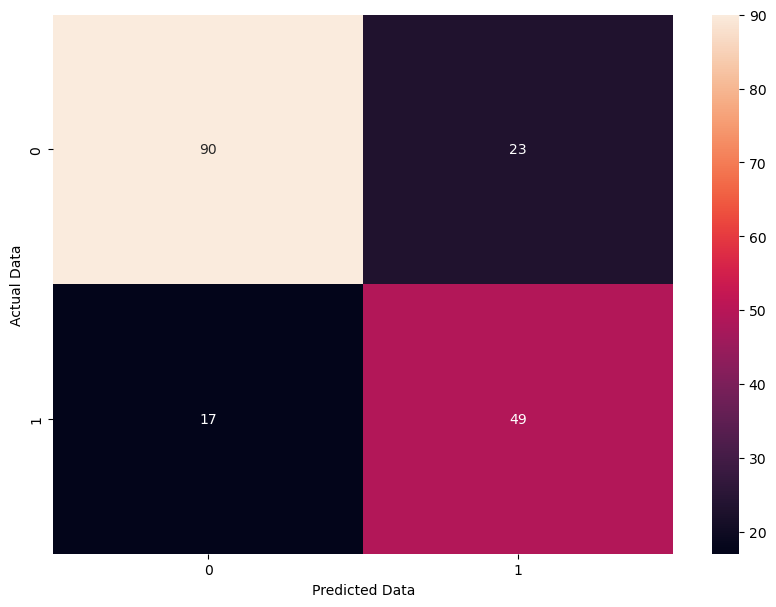

In [24]:
plt.figure(figsize=(10,7))
sns.heatmap(con_m, annot= True)
plt.xlabel('Predicted Data')
plt.ylabel('Actual Data')